In [3]:
import requests
import os
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
import pandas as pd

students = pd.read_csv("students.csv")
students.head()

,Full name,Sortable name,Canvas user id,Overall course grade,Assignment on time percent,Last page view time,Last participation time,Last logged out,Page Views,Participations,Email,SIS Id
0,Michael Edwards,"Edwards, Michael",168550000000002232,16.67,20.000000,"Oct 29, 2020","Oct 21, 2020",-,86,16,michael-edwards@lambdastudents.com,9d51c8f1-da0a-4e49-b598-62b63c26fd6a
1,Tevin Davis,"Davis, Tevin",168550000000001628,16.67,66.666667,"Oct 28, 2020","Oct 25, 2020",-,44,10,tevin-davis@lambdastudents.com,99157a50-1a43-4a25-a575-951140640d13
2,Russell Smith,"Smith, Russell",168550000000001657,66.67,64.285714,"Oct 25, 2020","Oct 25, 2020",-,75,22,russell-smith@lambdastudents.com,3138cc92-5269-4b67-b255-ef387aa27c19
3,Nick Verdina,"Verdina, Nick",168550000000001988,16.67,100.000000,"Oct 26, 2020","Oct 26, 2020",-,20,6,nick-verdina@lambdastudents.com,3e847d95-15bc-49e1-8c05-e9b71086c97e
4,Toni Darden,"Darden, Toni",168550000000002221,44.44,85.714286,"Oct 26, 2020","Oct 21, 2020",-,81,16,toni-darden@lambdastudents.com,56d07311-97b2-4aec-aaed-11f22aff1a88


In [5]:
pd.set_option("display.max_columns", None)

In [6]:
api_key = os.getenv("API-KEY")
api_url = os.getenv("API-URL")
headers = {"Authorization":
           f"Bearer {api_key}"}

In [5]:
r = requests.get('https://lambdaschool.instructure.com/api/v1'
'/users/168550000000002221/graded_submissions?per_page=100', headers=headers)
data_set = []

In [6]:
raw = r.json()

for submission in raw:
    data_set.append(submission)

In [8]:
def get_submissions(r):
    data_set = []
    raw = r.json()

    for submission in raw:
        data_set.append(submission)

    if "next" in r.links.keys():
        while "next" in r.links.keys():
            r = requests.get(r.links["next"]["url"], headers=headers)
            raw = r.json()
            for submission in raw:
                data_set.append(submission)
        if "last" in r.links.keys() and r.links['current']['url'] == r.links['last']['url']:
            print(done)
    else:
        print("Just one page!")
    return data_set

Just one page!


In [7]:
get_submissions(r)

In [9]:
r.links['last']['url'] == r.links['current']['url']

True

In [10]:
import json
with open("graded_subs.json", "w") as outfile:
    json.dump(data_set, outfile)

In [7]:
grades_df = pd.read_json("graded_subs.json")
grades_df.head()

,id,body,url,grade,score,submitted_at,assignment_id,user_id,submission_type,workflow_state,grade_matches_current_submission,graded_at,grader_id,attempt,cached_due_date,excused,late_policy_status,points_deducted,grading_period_id,extra_attempts,posted_at,late,missing,seconds_late,entered_grade,entered_score,preview_url,anonymous_id,attachments
0,499907,None,None,0,0,NaT,9489,2221,None,graded,True,2020-12-07 08:25:16+00:00,NaN,NaN,2020-12-07T07:59:00Z,NaN,NaN,NaN,NaN,NaN,2020-12-07 08:25:16+00:00,False,True,140310,0,0,https://lambdaschool.instructure.com/courses/5...,ofy3o,NaN
1,500054,None,None,0,0,NaT,9586,2221,None,graded,True,2020-12-03 08:16:55+00:00,NaN,NaN,2020-12-03T07:59:00Z,NaN,NaN,NaN,NaN,NaN,2020-12-03 08:16:55+00:00,False,True,485910,0,0,https://lambdaschool.instructure.com/courses/5...,tYKND,NaN
2,187304,,https://github.com/Toniddarden/Sprint-Challeng...,0,0,2020-11-09 22:26:01+00:00,3533,2221,online_url,graded,True,2020-11-20 03:05:50+00:00,2995.0,1.0,2020-11-10T07:59:59Z,0.0,NaN,NaN,NaN,NaN,2020-11-20 03:05:50+00:00,False,False,0,0,0,https://lambdaschool.instructure.com/courses/3...,78XmV,"[{'id': 73583, 'uuid': 'HrU6yXvNNAjvA9U9E5N9xF..."
3,187272,,https://github.com/Toniddarden/Graphs/tree/ton...,2,2,2020-10-27 00:40:04+00:00,3561,2221,online_url,graded,True,2020-11-20 02:53:58+00:00,2995.0,1.0,2020-10-27T06:59:59Z,0.0,NaN,NaN,NaN,NaN,2020-11-20 02:53:58+00:00,False,False,0,2,2,https://lambdaschool.instructure.com/courses/3...,4gjvw,"[{'id': 49115, 'uuid': 'TeOXLvkPPMMqY7p7Jn98Lh..."
4,187312,None,None,0,0,NaT,2041,2221,None,graded,True,2020-11-10 08:29:05+00:00,NaN,NaN,2020-11-10T07:59:59Z,NaN,NaN,NaN,NaN,NaN,2020-11-10 08:29:05+00:00,False,True,2473052,0,0,https://lambdaschool.instructure.com/courses/3...,Jen9e,NaN


In [8]:
grades_df.describe()

,id,grade,score,assignment_id,user_id,grader_id,attempt,excused,late_policy_status,points_deducted,grading_period_id,extra_attempts,seconds_late,entered_grade,entered_score
count,76.000000,76.000000,76.000000,76.000000,76.0,14.000000,14.000000,3.0,0.0,4.0,0.0,0.0,7.600000e+01,76.000000,76.000000
mean,195531.986842,0.223684,0.223684,3015.434211,2221.0,-1465.500000,1.071429,0.0,NaN,0.0,NaN,NaN,2.742876e+06,0.223684,0.223684
std,50383.605723,1.053232,1.053232,1273.942106,0.0,2432.947144,0.267261,0.0,NaN,0.0,NaN,NaN,1.925975e+06,1.053232,1.053232
min,187254.000000,0.000000,0.000000,2031.000000,2221.0,-2865.000000,1.000000,0.0,NaN,0.0,NaN,NaN,0.000000e+00,0.000000,0.000000
25%,187278.750000,0.000000,0.000000,2088.000000,2221.0,-2803.750000,1.000000,0.0,NaN,0.0,NaN,NaN,8.659250e+04,0.000000,0.000000
50%,187303.500000,0.000000,0.000000,3360.000000,2221.0,-2731.000000,1.000000,0.0,NaN,0.0,NaN,NaN,3.164252e+06,0.000000,0.000000
75%,187330.250000,0.000000,0.000000,3467.000000,2221.0,-1989.750000,1.000000,0.0,NaN,0.0,NaN,NaN,4.204652e+06,0.000000,0.000000
max,500054.000000,8.000000,8.000000,9586.000000,2221.0,2995.000000,2.000000,0.0,NaN,0.0,NaN,NaN,5.866052e+06,8.000000,8.000000


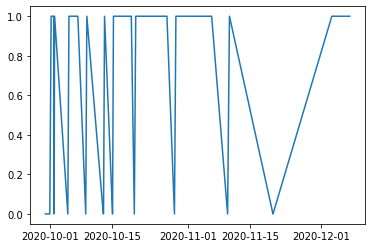

In [20]:
import matplotlib.pyplot as plt
plt.plot(grades_df['graded_at'], grades_df['submitted_at'].isna())

In [27]:
for i,t in zip(grades_df['submitted_at'],grades_df['graded_at']):
    prev_date = None
    if i == "NaT" and t != prev_date:
        prev_date = t
        print("Boo!!")


In [50]:
sub_grded_df = zip(grades_df['submitted_at'],grades_df['graded_at'])
for i,t in sub_grded_df:
    prev_date = None
    if type(i) == type(pd.NaT) and t.day != prev_date:
        prev_date = t.day
        print("Boo!")

Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!
Boo!


In [49]:
for i in grades_df['graded_at']:
    print(i.day)

7
3
20
20
10
9
6
6
6
6
6
5
5
5
5
3
3
2
2
2
2
2
30
29
29
29
29
28
27
27
27
27
23
23
23
23
23
22
21
21
21
20
20
19
19
19
19
16
15
15
15
15
15
13
13
13
13
9
9
9
9
9
7
7
7
5
5
5
2
1
1
1
1
1
30
29


In [47]:
print(grades_df['submitted_at'][0], pd.NaT)
grades_df['submitted_at'][0] == pd.NaT

NaT NaT


False

In [14]:
r2 = requests.get('https://lambdaschool.instructure.com/api/v1'
'/users/168550000000002221/missing_submissions?per_page=100', headers=headers)
data_set2 = []

In [15]:
raw = r2.json()

for submission in raw:
    data_set2.append(submission)

In [11]:
r2.links

{'current': {'url': 'https://lambdaschool.instructure.com/api/v1/users/168550000000002221/missing_submissions?page=1&per_page=100',
  'rel': 'current'},
 'first': {'url': 'https://lambdaschool.instructure.com/api/v1/users/168550000000002221/missing_submissions?page=1&per_page=100',
  'rel': 'first'},
 'last': {'url': 'https://lambdaschool.instructure.com/api/v1/users/168550000000002221/missing_submissions?page=1&per_page=100',
  'rel': 'last'}}

In [16]:
if "next" in r2.links.keys():
    while "next" in r2.links.keys():
        r2 = requests.get(r2.links["next"]["url"], headers=headers)
        raw = r2.json()
        for submission in raw:
            data_set.append(submission)
    if "last" in r2.links.keys() and r2.links['current']['url'] == r2.links['last']['url']:
        print(done)
else:
    print("Just one page!")

Just one page!


In [17]:
"next" in r.links.keys()

False

In [18]:
import json
with open("missing_subs.json", "w") as outfile:
    json.dump(data_set2, outfile)

In [9]:
missing_df = pd.read_json("missing_subs.json")
missing_df.describe()

,id,points_possible,assignment_group_id,grading_standard_id,position,group_category_id,grader_count,final_grader_id,allowed_attempts,course_id,max_name_length,original_course_id,original_assignment_id,original_assignment_name,original_quiz_id,quiz_id,anonymous_submissions
count,31.000000,31.000000,31.000000,0.0,31.000000,0.0,31.0,0.0,31.0,31.000000,31.0,0.0,0.0,0.0,0.0,24.000000,24.0
mean,4078.161290,0.967742,906.322581,NaN,6.903226,NaN,0.0,NaN,-1.0,397.741935,255.0,NaN,NaN,NaN,NaN,3442.666667,0.0
std,1963.409961,2.713962,714.809550,NaN,5.192012,NaN,0.0,NaN,0.0,69.342612,0.0,NaN,NaN,NaN,NaN,1816.307714,0.0
min,3348.000000,0.000000,635.000000,NaN,1.000000,NaN,0.0,NaN,-1.0,375.000000,255.0,NaN,NaN,NaN,NaN,2702.000000,0.0
25%,3385.000000,0.000000,642.000000,NaN,3.000000,NaN,0.0,NaN,-1.0,375.000000,255.0,NaN,NaN,NaN,NaN,2731.500000,0.0
50%,3461.000000,0.000000,643.000000,NaN,6.000000,NaN,0.0,NaN,-1.0,376.000000,255.0,NaN,NaN,NaN,NaN,2792.500000,0.0
75%,3533.500000,1.000000,647.000000,NaN,10.000000,NaN,0.0,NaN,-1.0,376.000000,255.0,NaN,NaN,NaN,NaN,2837.250000,0.0
max,10773.000000,15.000000,3170.000000,NaN,24.000000,NaN,0.0,NaN,-1.0,645.000000,255.0,NaN,NaN,NaN,NaN,8741.000000,0.0


In [13]:
missing_df.head()

,id,description,due_at,unlock_at,lock_at,points_possible,grading_type,assignment_group_id,grading_standard_id,created_at,updated_at,peer_reviews,automatic_peer_reviews,position,grade_group_students_individually,anonymous_peer_reviews,group_category_id,post_to_sis,moderated_grading,omit_from_final_grade,intra_group_peer_reviews,anonymous_instructor_annotations,anonymous_grading,graders_anonymous_to_graders,grader_count,grader_comments_visible_to_graders,final_grader_id,grader_names_visible_to_final_grader,allowed_attempts,lock_info,secure_params,course_id,name,submission_types,has_submitted_submissions,due_date_required,max_name_length,in_closed_grading_period,is_quiz_assignment,can_duplicate,original_course_id,original_assignment_id,original_assignment_name,original_quiz_id,workflow_state,muted,html_url,quiz_id,anonymous_submissions,published,only_visible_to_overrides,locked_for_user,lock_explanation,submissions_download_url,post_manually,anonymize_students,require_lockdown_browser
0,3435,"<div class=""description user_content teacher-v...",2020-10-02 01:30:00+00:00,NaT,2020-10-12 06:59:59+00:00,0,points,635,NaN,2020-09-24 16:00:37+00:00,2020-09-25 05:19:02+00:00,False,False,4,False,False,NaN,False,False,False,False,False,False,False,0,True,NaN,True,-1,"{'lock_at': '2020-10-12T06:59:59Z', 'can_view'...",eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJsdGlfY...,377,Hash Tables II Entry Ticket,[online_quiz],True,False,255,False,False,False,NaN,NaN,NaN,NaN,published,True,https://lambdaschool.instructure.com/courses/3...,2790.0,0.0,True,False,True,This assignment was locked Oct 12 at 12:59am.,https://lambdaschool.instructure.com/courses/3...,False,False,False
1,3378,,2020-10-07 06:59:59+00:00,NaT,2020-10-12 06:59:59+00:00,1,points,635,NaN,2020-09-24 16:00:35+00:00,2020-09-25 05:17:57+00:00,False,False,11,False,False,NaN,False,False,False,False,False,False,False,0,True,NaN,True,-1,"{'lock_at': '2020-10-12T06:59:59Z', 'can_view'...",eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJsdGlfY...,377,Hash Tables III Pulse Check,[online_quiz],True,False,255,False,True,False,NaN,NaN,NaN,NaN,published,True,https://lambdaschool.instructure.com/courses/3...,2733.0,0.0,True,False,True,This assignment was locked Oct 12 at 12:59am.,https://lambdaschool.instructure.com/courses/3...,False,False,False
2,3461,"<h1 id=""hash-tables-iii"">Hash Tables III</h1>\...",2020-10-07 06:59:59+00:00,NaT,2020-10-12 06:59:59+00:00,0,points,636,NaN,2020-09-24 16:00:38+00:00,2020-09-25 05:17:57+00:00,False,False,3,False,False,NaN,False,False,False,False,False,False,False,0,True,NaN,True,-1,"{'lock_at': '2020-10-12T06:59:59Z', 'can_view'...",eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJsdGlfY...,377,Hash Tables III Module Project,[online_url],True,False,255,False,False,True,NaN,NaN,NaN,NaN,published,True,https://lambdaschool.instructure.com/courses/3...,NaN,NaN,True,False,True,This assignment was locked Oct 12 at 12:59am.,https://lambdaschool.instructure.com/courses/3...,False,False,False
3,3554,"<h1 id=""graphs-i"">Graphs I</h1>\n<p>This is a ...",2020-10-15 06:59:59+00:00,NaT,2020-10-26 06:59:59+00:00,0,points,648,NaN,2020-09-24 16:00:42+00:00,2020-11-12 17:58:00+00:00,False,False,1,False,False,NaN,False,False,False,False,False,False,False,0,True,NaN,True,-1,"{'lock_at': '2020-10-26T06:59:59Z', 'can_view'...",eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJsdGlfY...,376,Graphs I Module Project,[online_url],True,False,255,False,False,True,NaN,NaN,NaN,NaN,published,True,https://lambdaschool.instructure.com/courses/3...,NaN,NaN,True,False,True,This assignment was locked Oct 26 at 12:59am.,https://lambdaschool.instructure.com/courses/3...,False,False,False
4,3504,"<div class=""description user_content teacher-v...",2020-10-16 01:30:00+00:00,NaT,2020-10-26 06:59:59+00:00,0,points,647,NaN,2020-09-24 16:00:40+00:00,2020-09-25 18:07:41+00:00,False,False,7,False,False,NaN,False,False,False,False,False,False,False,0,True,NaN,True,-1,"{'lock_at': '2020-10-26T06:59:59Z', 'can_view'...",eyJ0eXAiOiJKV1QiLCJh

In [12]:
miss_grded_df = grades_df.merge(missing_df)

In [13]:
miss_grded_df.describe()

,id,grade,score,assignment_id,user_id,grader_id,attempt,excused,late_policy_status,points_deducted,grading_period_id,extra_attempts,seconds_late,entered_grade,entered_score,points_possible,assignment_group_id,grading_standard_id,position,group_category_id,grader_count,final_grader_id,allowed_attempts,course_id,max_name_length,original_course_id,original_assignment_id,original_assignment_name,original_quiz_id,quiz_id,anonymous_submissions
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
